In [1]:
import pandas as pd

DATA COLLECTION:

In [18]:
movies=pd.read_csv('top10K-TMDB-movies.csv')
print(movies.columns)

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')


Data Preprocessing:

In [3]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [4]:
print("Summary Statistics:")
movies.describe()

Summary Statistics:


,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [5]:
print("Dataset Information:")
movies.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [6]:
print("Missing Values:")
movies.isnull().sum()

Missing Values:


id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [7]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

Exploratory Data Analysis (EDA):

In [8]:
import matplotlib.pyplot as plt

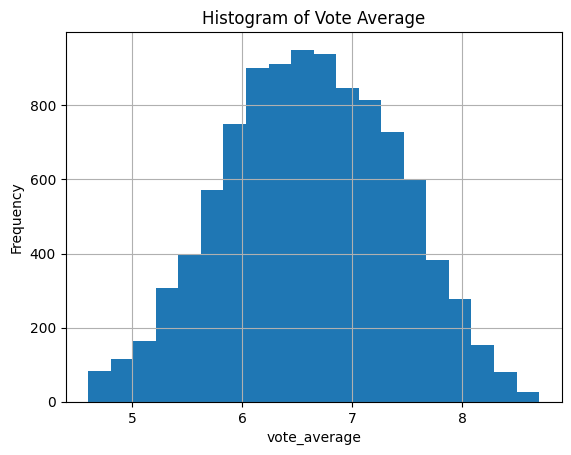

In [9]:
movies['vote_average'].hist(bins=20)
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.title('Histogram of Vote Average')
plt.show()

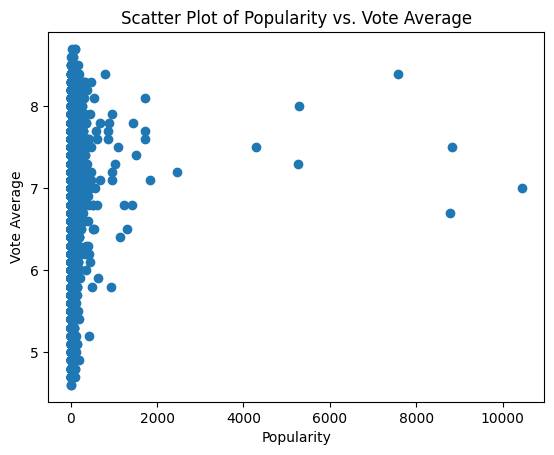

In [10]:
plt.scatter(movies['popularity'], movies['vote_average'])
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Scatter Plot of Popularity vs. Vote Average')
plt.show()

<ipython-input-19-00db8c642869>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


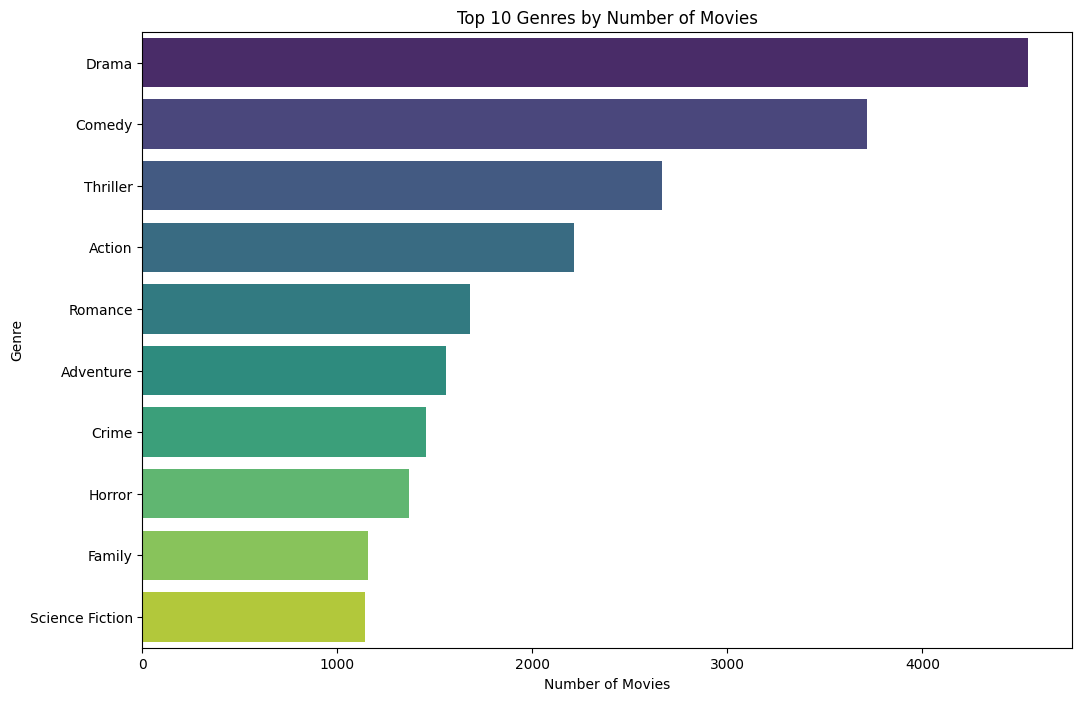

In [19]:
import seaborn as sns

# Splitting genres and exploding into individual rows
movies['genre'] = movies['genre'].str.split(',')
movies_genre_exploded = movies.explode('genre')

# Bar plot of top genres
plt.figure(figsize=(12, 8))
top_genres = movies_genre_exploded['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Number of Movies')
plt.show()


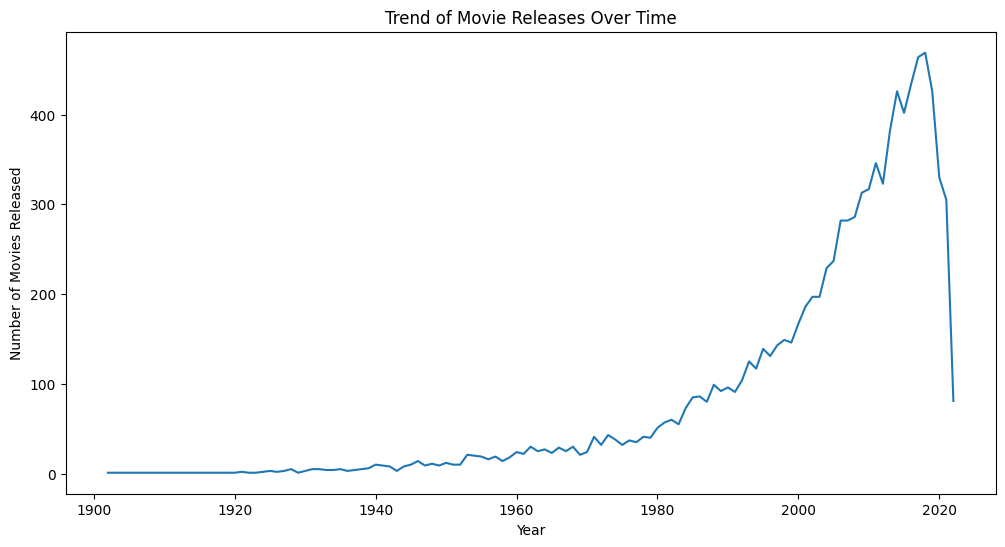

In [21]:
# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Number of movies released per year
movies['release_year'] = movies['release_date'].dt.year

plt.figure(figsize=(12, 6))
movies_per_year = movies['release_year'].value_counts().sort_index()
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Trend of Movie Releases Over Time')
plt.show()


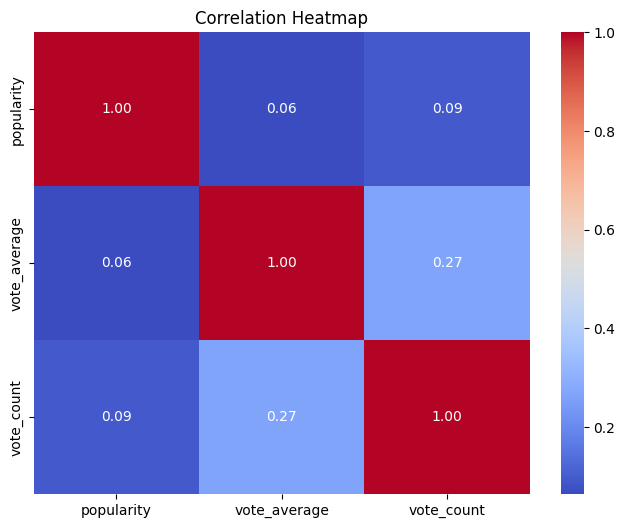

In [22]:
# Correlation matrix
correlation_matrix = movies[['popularity', 'vote_average', 'vote_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#COSINE SIMILARITY Custom implementation

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

#Loading the dataset
movies = pd.read_csv('top10K-TMDB-movies.csv')
movies = movies[['id', 'title', 'genre', 'overview']]
movies['details'] = movies['genre'] + movies['overview']
movies = movies.drop(columns=['genre', 'overview'])

# Conversion to feature vectors
cv = CountVectorizer(max_features=1000, stop_words='english')
cv_matrix = cv.fit_transform(movies['details'].values.astype('U')).toarray()


In [15]:

# Calculate cosine similarity matrix without using sklearn's cosine_similarity
dot_product = np.dot(cv_matrix, cv_matrix.T)
norms = np.linalg.norm(cv_matrix, axis=1)
epsilon = 1e-10  # Small value to avoid division by zero
cs_matrix = dot_product / (np.outer(norms, norms) + epsilon)

# To ensure no numerical instability, we can clip values to the range [-1, 1]
cs_matrix = np.clip(cs_matrix, -1, 1)

In [16]:
# Split data into train and test sets
train_data, test_data = train_test_split(movies, test_size=0.2, random_state=0)

# Recommendation function
def recommend(movie, cs_matrix, movie_data):
    index = movie_data[movie_data['title'] == movie].index[0]
    dist = sorted(list(enumerate(cs_matrix[index])), reverse=True, key=lambda x: x[1])
    recommended_titles = [movie_data.iloc[i[0]].title for i in dist[1:6]]  # Excluding the movie itself
    return recommended_titles

# Generate recommendations for test set movies
recommendations = {}
for movie in test_data['title']:
    recommendations[movie] = recommend(movie, cs_matrix, movies)

# Mock ground truth for evaluation (e.g., user liked these movies after watching the test set movies)
ground_truth = {}
for movie in test_data['title']:
    ground_truth[movie] = recommend(movie, cs_matrix, movies)[:5]

# Evaluate the model
all_y_true = []
all_y_pred = []

for movie, recs in recommendations.items():
    if movie in ground_truth:
        y_true = [1 if rec in ground_truth[movie] else 0 for rec in recs]
        y_pred = [1] * len(recs)
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(all_y_true, all_y_pred, zero_division=0)
recall = recall_score(all_y_true, all_y_pred, zero_division=0)
f1 = f1_score(all_y_true, all_y_pred, zero_division=0)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 1.0
Recall: 1.0
F1-score: 1.0
